
# Introduction to data analysis using pandas


Pandas is a popular open source Python package for data science, data engineering, analytics, and machine learning.

This notebook will give you a gentle introduction to pandas, but the exercises have been deisgned to allow you to complete them in multiple ways so feel free to google and find different functions. For more helpful documentation, check out these resources:

## Completely new to coding?

*   If you are new to google colab you can [watch an introduction to it here.](https://www.youtube.com/watch?v=inN8seMm7UI)
*   If you have never used python before [you can read an introduction to the language here](https://www.w3schools.com/python/python_intro.asp)

### New to pandas?

*   Introduction to Pandas in colab: https://colab.google/articles/pandas  
*   Pandas documentation introduction: https://pandas.pydata.org/docs/user_guide/10min.html







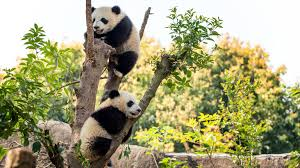


In [1]:
import pandas as pd

# Data we are using for analysis

This data is from the NSHBSA Open Data Portal, and is called the 'Prescription Cost analysis' dataset.

https://opendata.nhsbsa.net/dataset/prescription-cost-analysis-pca-monthly-data

This data is open source, which means:

- We can share it openly
- It has no security concerns

This is a monthly dataset that describes how many medicines were prescribed across all GP Practices in england, per NHS Region, and what they cost.
This is 'real data', so actually describes real anti-depressant prescribing in England.
We have merged, simplified and filtered all these monthly files into a single dataset.

The data is being read into this notebook using this github repo link below (do not delete).



In [2]:
! git clone https://github.com/nhsengland/Digdata

Cloning into 'Digdata'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 40 (delta 21), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (40/40), 238.24 KiB | 4.67 MiB/s, done.
Resolving deltas: 100% (21/21), done.


### pca_regional_drug_summary_df

This dataset now contains 6 columns:


*   *YEAR*: The year in the format YYYY. There are 4 years-worth of prescribing information in the dataset.
*   *YEAR_MONTH*: The year and month, in the format YYYYMM, where 202401 is the same as January 2024. There are 46 year-month values in the data.
*   *REGION*: The NHS Region. There are 7 regions in the data.
*   *DRUG*: The name of the anti-depressant medicine. There are 32 of these in the data.
*   *ITEMS*: How many items were prescribed.
*   *COST*: The combined cost for all those items.

In a sentence we could describe this dataset as:

- Per English NHS Region and per year-month, the volume and cost of each antidepressant drug prescribed.

And what we are going to do with this data is:

- Understand national and regional prescribing volumes and costs
- Understand national and regional prescribing trends
- Understand monthly and annual trends
- And finally, maybe even predict future monthly anti-depressant prescribing volumes


In [3]:
pca_regional_drug_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_DRUG_SUMMARY.csv')

display(pca_regional_drug_summary_df)

,YEAR,YEAR_MONTH,REGION_NAME,BNF_CHEMICAL_SUBSTANCE,ITEMS,COST
0,2021,202101,EAST OF ENGLAND,Agomelatine,183,7405.37
1,2021,202101,LONDON,Agomelatine,411,18227.63
2,2021,202101,MIDLANDS,Agomelatine,252,12344.56
3,2021,202101,NORTH EAST AND YORKSHIRE,Agomelatine,366,11183.06
4,2021,202101,NORTH WEST,Agomelatine,119,4783.72
...,...,...,...,...,...,...
9450,2024,202410,MIDLANDS,Vortioxetine,5989,149309.82
9451,2024,202410,NORTH EAST AND YORKSHIRE,Vortioxetine,6687,139779.09
9452,2024,202410,NORTH WEST,Vortioxetine,5430,124510.32
9453,2024,202410,SOUTH EAST,Vortioxetine,7018,178709.85


### pca_regional_summary_df

So we can see that the original data differs in a few ways:

- It only contains antidepressant drugs
- It doesn't contain BNF Chapter and BNF Section information

The BNF stands for the *British National Formulary*.
The BNF is structured hierarchically into Chapters, Sections and Chemical Substances (Drugs).

For example:

- Amitriptyline hydrochloride is an actual antidepressant *DRUG*
- Amitriptyline hydrochloride is one of many *DRUG* within the 'Antidepressant drugs' *BNF_SECTION*
- Antidepressant drugs is one of many *BNF_SECTION* within the '04: Central Nervous System' *BNF_CHAPTER*
- And there are 23 *BNF_CHAPTER* (although very little prescribing stems from some of the chapters)

In summary, BNF chapters are split into sections, which are then split into actual drugs (i.e. a hierarchy).

In [4]:
pca_regional_summary_df = pd.read_csv('/content/Digdata/BSA_ODP_PCA_REGIONAL_SUMMARY.csv')

display(pca_regional_summary_df)

,YEAR_MONTH,REGION_NAME,ITEMS,COST
0,202101,EAST OF ENGLAND,796466,3406002.61
1,202101,LONDON,678021,3205663.66
2,202101,MIDLANDS,1249416,5698605.43
3,202101,NORTH EAST AND YORKSHIRE,1428677,5741978.96
4,202101,NORTH WEST,1003963,4435228.70
...,...,...,...,...
317,202410,MIDLANDS,1515794,3650020.71
318,202410,NORTH EAST AND YORKSHIRE,1845998,3766629.55
319,202410,NORTH WEST,1196871,2687352.76
320,202410,SOUTH EAST,972188,2852364.46


# Part 1 Pandas introduction: Transforming and Aggregating Data

#### Printing data

There are a few methods you can use to view your dataframe, given the name df:


```python
# shows you the top 5 rows of a dataframe
df.head(5)

# this displays your dataframe
display(df)

# this displays the datatype of each column
df.info()

# this prints a list of columns in the df
df.columns
```

#### Selecting data

To view only one, or multiple columns in the dataframe, use the following syntax:

```python
#this will display a single column, 'prescription_count'
df['prescription_count']

#this will display both 'prescription_count' and 'gp_practice'. Remember to use double brackets to view multiple columns!
df[['prescription_count', 'gp_practice']]



#### Aggregating data

To read more:

*   [grouby documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*   [sort_values documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html)



```python
# this calculates the total number stored in 'prescription_count', so the total count of prescriptions
df['prescription_count'].sum()

# this calculates the total number of prescriptions, grouped by GP practice
df.groupby('gp_practice', as_index=False)['prescription_count'].sum()

# this sorts the values of the df by the values in column 'cost' from low to high
df.sort_values(by=['cost'])



#### Filtering data

To read more:


*   [Filtering to a column value](https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/)
*   [Using the query method](https://www.w3schools.com/python/pandas/ref_df_query.asp)



```python

# this filters to a specific value within a column, in this instance where the year is 2023
df[df['year']==2023]

# this filters to where drug counts are greater than 100
df[df['drug_count']>100]

# this also filters to where drug counts are greater than 100
df.query('drug_count > 100')


## Part 1: Transforming and Aggregating Data Exercises

### Question 1: Nationally, calculate the top 10 prescribed anti-depressants across the whole time frame, sorted from biggest from smallest.

In [5]:
# Group the dataset by antidepressants and sum their "ITEMS"
antidepressant_sums = pca_regional_drug_summary_df.groupby('BNF_CHEMICAL_SUBSTANCE')['ITEMS'].sum()

# Then sort from greatest to least, and show the top 10 antidepressants
antidepressant_sums.sort_values(ascending=False).head(10)

,ITEMS
BNF_CHEMICAL_SUBSTANCE,
Sertraline hydrochloride,85402251
Amitriptyline hydrochloride,59272937
Citalopram hydrobromide,52891620
Mirtazapine,46335570
Fluoxetine hydrochloride,28211759
Venlafaxine,21447209
Duloxetine hydrochloride,14262656
Escitalopram,6580386
Paroxetine hydrochloride,4886615


### Question 2: Calculate the monthly national cost of Mirtazapine prescribing

In [6]:
# Filter all BNF=Mirtazapine
mirtazapine_stats = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"]=="Mirtazapine"]

# To calculate the monthly national cost, group by "YEAR_MONTH", then sum the "COST" column
mirtazapine_stats.groupby("YEAR_MONTH")["COST"].sum()

,COST
YEAR_MONTH,
202101,2380030.90
202102,2249220.63
202103,2523008.14
202104,2039348.02
202105,1935629.32
202106,2055820.88
202107,1609248.23
202108,1539582.17
202109,1621383.70


### Question 3: What is the annual spend of Sertraline hydrochloride prescribing in the Midlands region?

In [7]:
# Filter all BNF="Sertraline"
sertraline_stats = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"]=="Sertraline hydrochloride"]

# To calculate annual spend in the Midlands, filter for "MIDLANDS", group by "YEAR", then take the sum of "COST" for each year.
sertraline_stats[pca_regional_drug_summary_df["REGION_NAME"]=="MIDLANDS"].groupby("YEAR")["COST"].sum()

<ipython-input-7-bfc380159e60>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sertraline_stats[pca_regional_drug_summary_df["REGION_NAME"]=="MIDLANDS"].groupby("YEAR")["COST"].sum()


,COST
YEAR,
2021,17477276.46
2022,6433863.59
2023,7600322.04
2024,8094889.16


# Part 2: Data Visualisation

Visualising is an important tool in both analytics and data science.

Visualising data can help us better understand data and see trends in data, amongst other things.

There are several packages which you can explore through these links here:

*   A good start point for data visualisations in pandas can be found here-  https://www.geeksforgeeks.org/pandas-built-in-data-visualization-ml/
*   Introduction to the python package matplotlib - https://www.geeksforgeeks.org/python-introduction-matplotlib/
*   Introduction to the python package seaborn - https://www.geeksforgeeks.org/introduction-to-seaborn-python/





## Part 2: Data Visualisation Exercises

### Question 1: Create a horizontal bar chart of the top 5 most prescribed drugs in 2024, arranged in order.

<Axes: title={'center': 'Top Five Most Prescribed Antidepressants in 2024'}, xlabel='Number Prescribed (in ten millions)', ylabel='BNF_CHEMICAL_SUBSTANCE'>

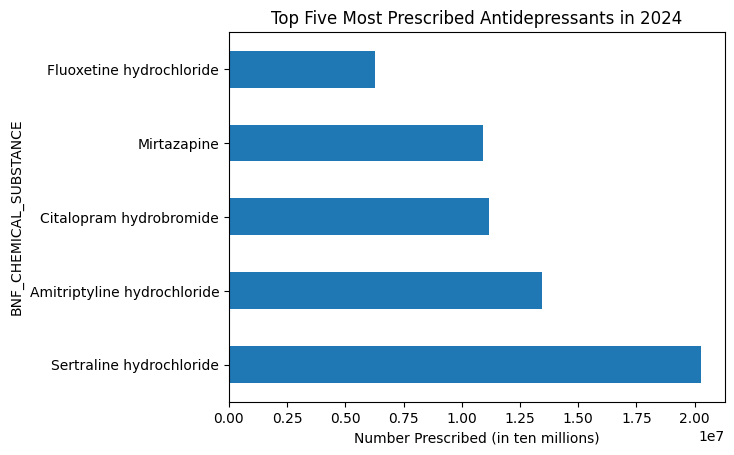

In [8]:
# Filter the dataset for YEAR=2024, groupby "BNF", and take the sum
drug_summary_2024 = pca_regional_drug_summary_df[pca_regional_drug_summary_df["YEAR"]==2024].groupby('BNF_CHEMICAL_SUBSTANCE')["ITEMS"].sum()

# Sort by descending, then take the top 5 most prescribed
drug_summary_2024.sort_values(ascending=False).head(5).plot.barh(
    title="Top Five Most Prescribed Antidepressants in 2024",
    xlabel="Number Prescribed (in ten millions)",
    )

### Question 2: Create a vertical bar chart showing the total annual cost of Sertraline hydrochloride prescribing in the NORTH WEST region.


<Axes: title={'center': 'Annual Cost of Sertraline in the North West Region'}, xlabel='YEAR', ylabel='Cost (in ten millions of £)'>

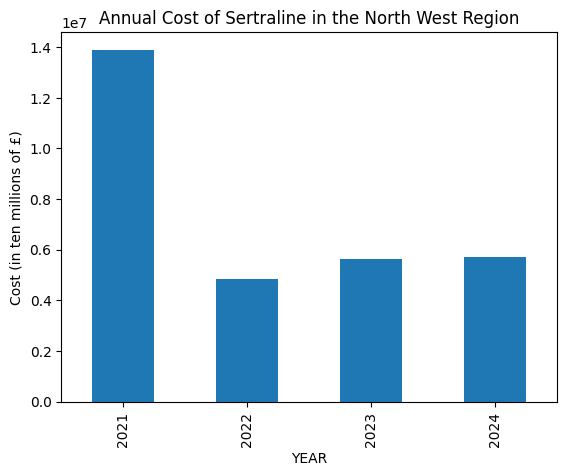

In [9]:
# Start with "sertraline_stats", which we filtered for Sertraline hydrochloride in Part 1
# Filter for the "NORTH WEST" region, then groupby YEAR before taking sum
northwest_sertraline_stats = sertraline_stats[sertraline_stats["REGION_NAME"]=="NORTH WEST"].groupby("YEAR")["COST"].sum()

# Finally, create a bar chart with the proper names and labels
northwest_sertraline_stats.plot.bar(title="Annual Cost of Sertraline in the North West Region",
                  ylabel="Cost (in ten millions of £)")







### Question 3: Create a line chart of the nationally monthly cost (rounded to the nearest pound) of escitalopram.

<Axes: title={'center': 'National Monthly Cost of Escitalopram Over Time'}, xlabel='Months since January 2021', ylabel='Cost (£)'>

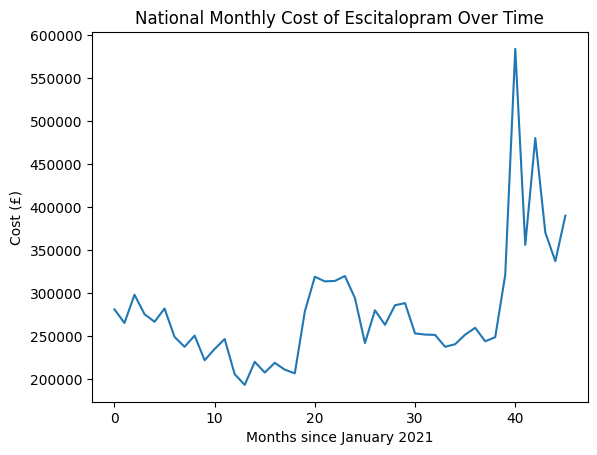

In [10]:
# Filter for BNF="Escitalopram"
escitalopram_stats = pca_regional_drug_summary_df[pca_regional_drug_summary_df['BNF_CHEMICAL_SUBSTANCE']=="Escitalopram"]

# To find monthly cost, group by "YEAR_MONTH" before summing the cost column and rounding to nearest pound
# Lastly, plot with a line chart
escitalopram_monthly_sums = escitalopram_stats.groupby("YEAR_MONTH")["COST"].sum().round(0)
escitalopram_monthly_sums.reset_index()["COST"].plot.line(
    title="National Monthly Cost of Escitalopram Over Time",
    xlabel="Months since January 2021",
    ylabel="Cost (£)",
)

# Part 3: Data Metrics and Insights


#### Advanced analysis introduction


*   [Introduction to statistics in pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)
*   [Pivot tables](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



```python
# this gives a summary of some descriptive statistics for the dataframe
df.describe()

# this will return the average number in the drug count field
df['drug_count'].mean()

# this will return the minimum value, the lowest observed value
df['drug_count'].min()

# this will return the maximum value, the highest observed value
df['drug_count'].max()

# this will pivot the df so each row represents a year, the columns are now the regions and the values are the summed count of the items within the column 'drug_count'
df.pivot_table(index='year', columns='region', values='drug_count', aggfunc=sum)  



## Part 3: Data Metrics and Insight Exercises

For these exercises, you will need to use the dataframe pca_regional_drug_summary_df




### Question 1: For context, create a monthly line chart showing total national prescribing cost

In [11]:
# We can pivot the table so that the index is YEAR_MONTH, and the values are the sums of items in column "COST"
pca_regional_drug_summary_df.pivot_table(index="YEAR_MONTH", values="COST", aggfunc=sum)

<ipython-input-11-3209d348f0e2>:2: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pca_regional_drug_summary_df.pivot_table(index="YEAR_MONTH", values="COST", aggfunc=sum)


,COST
YEAR_MONTH,
202101,30211076.90
202102,28478445.17
202103,31933609.64
202104,24695554.55
202105,23672108.18
202106,25222624.58
202107,21726963.94
202108,20640541.29
202109,21776370.90


### Question 2: Create *annual* summary statistics, for the min, Q1, median, Q3 and maximum national monthly prescribing cost (i.e. all drugs across all regions)


In [12]:
# First group the dataset by "YEAR", then apply "describe()" on the "COST" column
annual_prescribing_cost_stats = pca_regional_drug_summary_df.groupby("YEAR")["COST"].describe()
annual_prescribing_cost_stats

,count,mean,std,min,25%,50%,75%,max
YEAR,,,,,,,,
2021,2476.0,116356.724491,236499.478040,1.10,7647.750,37209.39,108106.39,2721513.20
2022,2469.0,90987.625038,134585.325332,1.51,6859.040,36545.00,108977.22,829847.10
2023,2463.0,93387.600430,140661.545183,19.75,6294.680,36175.78,112120.77,762322.27
2024,2047.0,92422.535169,151891.730513,12.56,5700.365,34090.06,112958.97,1163947.56



### Question 3: Create a grouped boxplot that shows the above information (4 boxplots, 1 per year)

<Axes: xlabel='YEAR', ylabel='COST (millions of £)'>

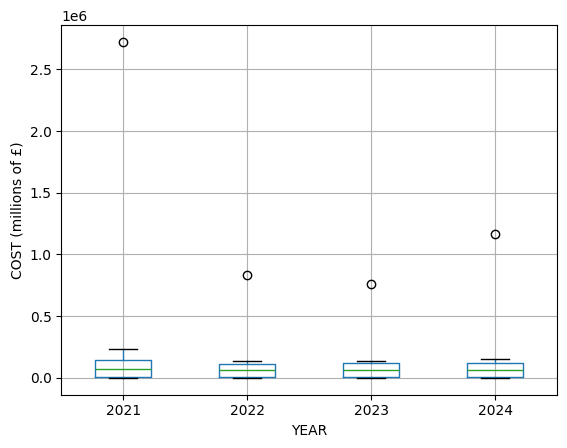

In [13]:
# Using the stats generated from Q2, transpose then convert to boxplot. DataFrame boxplots take the columns and turn them into plots,
# so we must transpose so that there is one boxplot per year.
annual_prescribing_cost_stats.T.boxplot(
    xlabel="YEAR",
    ylabel="COST (millions of £)",
)

### Question 4: Calculate the annual *mean* monthly total national prescribing cost and display in a vertical barchart

<Axes: title={'center': 'Average Monthly National Prescribing Cost Per Year'}, xlabel='YEAR', ylabel='COST (in £)'>

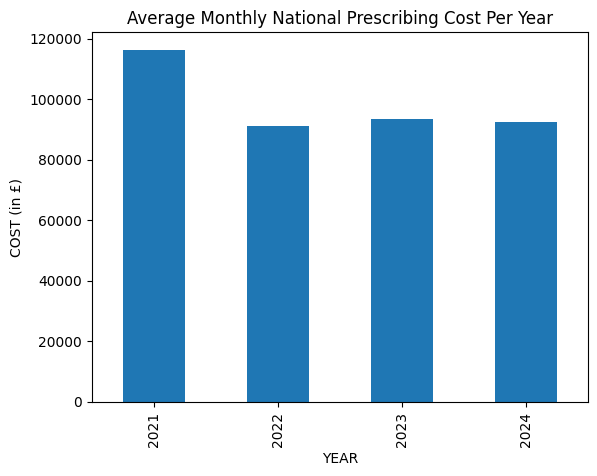

In [14]:
# First group by YEAR, then take the mean() of COST for each group
# Then apply ".plot.bar()" to display the associated bar chart
pca_regional_drug_summary_df.groupby("YEAR")["COST"].mean().plot.bar(
    title="Average Monthly National Prescribing Cost Per Year",
    ylabel="COST (in £)"
)

### Question 5: Create a (pivoted) table that shows the cost of anti-depressant prescribing per region per year?
#### Note: Each row should be a year and each column should be a region.

In [15]:
pca_regional_drug_summary_df.pivot_table(index="YEAR",
                                         columns=["REGION_NAME"],
                                         values="COST")

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,93802.363977,87646.630028,149194.106381,154912.926314,119179.077273,124592.873887,84527.507020
2022,73696.869655,70174.863306,117601.072953,118938.654543,90936.255632,98502.264637,66422.089046
2023,74986.951609,72957.926722,121485.024472,121457.530592,93672.301773,100628.589658,67412.777188
2024,74334.260655,71604.552416,120871.233278,124285.880918,92155.831189,98578.387182,64257.478028


# Report Task

You are a Public Health Analyst and you have been asked to write a report.
This report will describe and analyse antidepressant prescribing, looking at volume and cost, both nationally and regionally.
The title of this report is 'Longitudinal Analysis of Antidepressant Prescribing'.
Longitudinal just means the analysis is over an extended period of time, which we have with 4 years of monthly data.
The report is to be split into two sections:

Part One: To set the context for the report, this will be overall national and regional figures

Part Two: The will be followed-up by a more exploratory analysis that delves into antidepressant prescribing cost trends.

Part Two Extension: Those attempting the extension task can then look at creating standardised metrics to understand more specific prescribing patterns.






## Part One

Part One is a directed analysis and the same content needs to be covered by both streams.
These required content for Part One is:

1.  Create two vertical bar charts for comparison.
    First, create a bar chart showing the total annual antidepressant prescribing (items).
    Second, create a bar chart that shows the total antidepressant prescribing cost.
    Describe the trend of each chart and compare the charts against each other.

2.  Create two tables for comparison.
    First, create a table showing the total annual antidepressant prescribing per region (items).
    Second, create a table showing the annual antidepressant prescribing cost per region.
    Describe some regional changes and contrasts between 2021 and 2024.

3.  By now you may have noticed there are contrasts between antidepressant prescribing volumes and costs.
    Next, we will create two horizontal bar charts for comparison.
    First, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) showing the 10 most prescribed antidepressants across the four years (items).
    Second, create an [ordered bar chart](https://service-manual.ons.gov.uk/data-visualisation/guidance/ordering-in-charts#:~:text=When%20showing%20the%20categories%20in%20a%20chart%2C%20for,bar%20chart%2C%20sort%20the%20categories%20by%20their%20value.) that shows antidepressants with the greatest total prescribing cost across the entire four year period..
    Highlight and describe any differences between the charts.

Try and make text between sections flow, so the report reads well.
The findings from part one may inform how you approach part two.

---
The cost of antidepressant prescribing has fluctuated between 2021 and 2024, while the number of antidepressants prescribed has generally increased. To assist the NHS with decision-making surrounding antidepressants budgeting and mental health service provision, this report identifies sertraline hydrochloride antidepressants as the primary driver of prescription increases and cost fluctuations across all NHS regions, and identifies regions more deeply impacted by sertraline hydrochloride than others.

This report begins with an analysis of total antidepressant prescribing and total antidepressant cost across the four years, which provides context for longitudinal analysis.

## National Total Annual Antidepressant Prescribing and Total Antidepressant Prescribing Cost

<Axes: title={'center': 'Figure 1: Annual Number Of Antidepressants Prescribed'}, xlabel='YEAR', ylabel='Number of Prescriptions (ten millions)'>

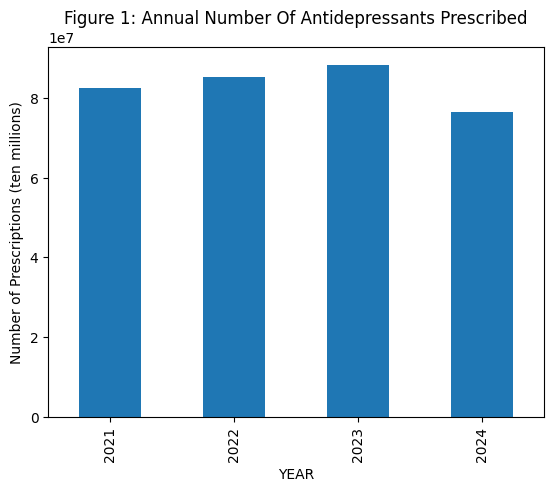

In [16]:
# BAR CHART FOR TOTAL ANNUAL ANTIDEPRESSANT PRESCRIBING
# Group by year, then sum the items before plotting in a bar chart.
annual_drug_summary = pca_regional_drug_summary_df.groupby("YEAR")

annual_drug_summary["ITEMS"].sum().plot.bar(
    title="Figure 1: Annual Number Of Antidepressants Prescribed",
    ylabel="Number of Prescriptions (ten millions)",
)

<Axes: title={'center': 'Figure 2: Annual Cost of Antidepressants Prescribed'}, xlabel='YEAR', ylabel='Cost of Prescriptions (in hundred million £)'>

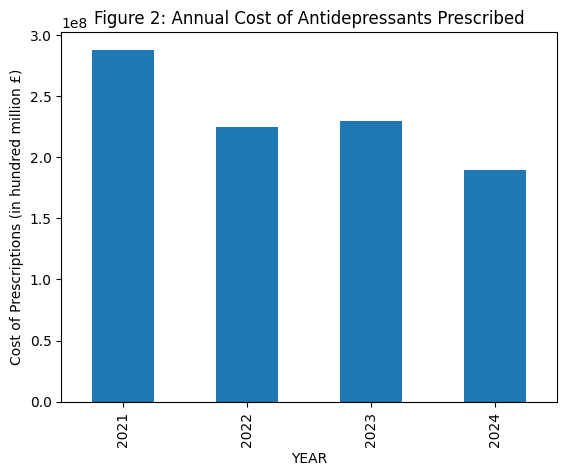

In [17]:
# TOTAL ANTIDEPRESSANT PRESCRIBING COST
# Group by year, then sum the costs before plotting in bar chart.
annual_drug_summary["COST"].sum().plot.bar(
    title="Figure 2: Annual Cost of Antidepressants Prescribed",
    ylabel="Cost of Prescriptions (in hundred million £)",
)

The annual total number of antidepressant prescriptions began above 80 million in 2021 and steadily rose until 2023. It then dropped below 80 million prescriptions in 2024. Meanwhile, the annual total cost of antidepressants began at approximately 280 million pounds in 2021 before dropping dramatically to approximately 230 million pounds in 2022. Although the total cost of prescriptions rose slightly in 2023, it proceeded to drop below 200 million pounds in 2024.

As expected, when the number of antidepressant prescriptions fell in 2024, the total cost of antidepressant prescriptions in 2024 also fell. When the number of antidepressant prescriptions rose in 2023, the total cost of antidepressant prescriptions in 2023 also rose, albeit just slightly. However, the opposite occurred in 2022; while antidepressant prescriptions increased, the cost of antidepressant prescriptions fell by almost 50 million pounds.

In general, it appears that the annual cost of antidepressant prescriptions is on a downward trend, while the number of antidepressant prescriptions was on an upward trend before falling in 2024.

However, it is important to note that the data for 2024 is missing two months; it only includes January to October. The missing months likely contributes to the drop in number and cost of antidepressant prescriptions. This information must be considered throughout the rest of the report.  

## Regional Total Annual Antidepressant Prescribing and Total Antidepressant Prescribing Cost

In [18]:
# TABLE FOR TOTAL ANNUAL ANTIDEPRESSANT PRESCRIBING PER REGION
pca_regional_drug_summary_df.pivot_table(index="YEAR",
                                         columns=["REGION_NAME"],
                                         values="ITEMS")

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,27848.092219,23821.570637,42473.966851,50505.197143,35275.769886,29849.988732,23757.750716
2022,28412.344828,25710.752778,44754.543175,52157.285714,36723.775862,30179.868715,24148.257225
2023,29215.531609,27105.744444,46530.558333,53596.154930,38402.700581,31469.774929,24668.620290
2024,30046.651724,27794.493289,48415.033445,58271.969388,39785.111888,32371.484536,24842.173010


In [19]:
# TABLE FOR TOTAL ANNUAL PRESCRIBING COST PER REGION
# Apply pivot_table, placing the year as rows and regions as columns.
pca_regional_drug_summary_df.pivot_table(index="YEAR",
                                         columns=["REGION_NAME"],
                                         values="COST")

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR,,,,,,,
2021,93802.363977,87646.630028,149194.106381,154912.926314,119179.077273,124592.873887,84527.507020
2022,73696.869655,70174.863306,117601.072953,118938.654543,90936.255632,98502.264637,66422.089046
2023,74986.951609,72957.926722,121485.024472,121457.530592,93672.301773,100628.589658,67412.777188
2024,74334.260655,71604.552416,120871.233278,124285.880918,92155.831189,98578.387182,64257.478028


Overall, the number of antidepressants prescribed increased across all regions between 2021 and 2024. The region with the greatest change (range) is North East and Yorkshire, with the number of prescriptions growing by almost eight thousand between 2021 and 2024. The South West saw the smallest change, with the number of prescriptions growing by one thousand between 2021 and 2024.

The cost of antidepressants saw a decrease overall across the four years. All regions saw a dramatic drop in cost of prescriptions from 2021 to 2022, then a smaller increase (typically 15,000 pounds) between 2022 and 2023 before dipping down again. The North East and Yorkshire had the highest cost of prescriptions across the years 2021, 2022, and 2024; the Midlands had the highest cost of prescriptions in 2023.

Again, notice that the cost of antidepressants decreased dramatically between 2021 and 2022, despite an increase in the number of antidepressants prescribed. The same occurs between 2023 and 2024, except in the North East and Yorkshire. The North East and Yorkshire is the only region where the cost of antidepressants increased between 2023 and 2024, likely because this region saw a significantly higher increase in number of antidepressants prescribed (approximately 5000 more prescriptions).

## Most Prescribed Antidepressants and Most Expensive Antidepressants

<Axes: title={'center': 'Figure 3: Top 10 Prescribed Antidepressants Between 2021 and 2024'}, xlabel='Number of Prescriptions (in ten millions)', ylabel='Antidepressant Name'>

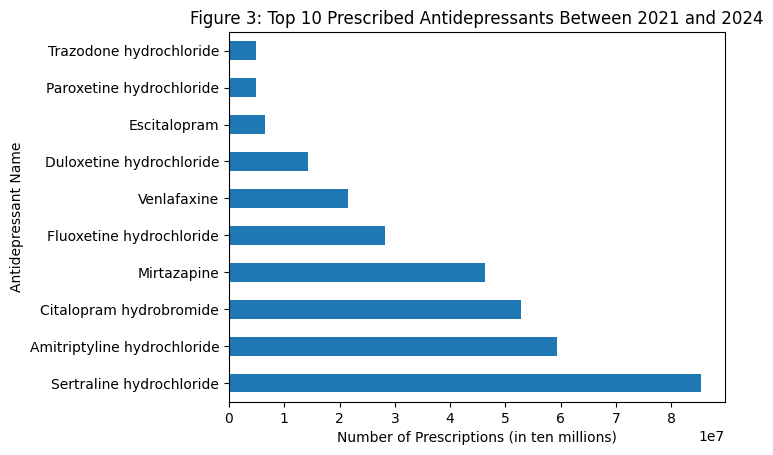

In [20]:
# Group by "BNF_CHEMICAL_SUBSTANCE", then sum the "ITEMS"
chemical_summary = pca_regional_drug_summary_df.groupby("BNF_CHEMICAL_SUBSTANCE")
chemical_summary["ITEMS"].sum().sort_values(ascending=False).head(10).plot.barh(
    title="Figure 3: Top 10 Prescribed Antidepressants Between 2021 and 2024",
    xlabel="Number of Prescriptions (in ten millions)",
    ylabel="Antidepressant Name",
)

<Axes: title={'center': 'Figure 4: Top 10 Most Expensive Antidepressants Between 2021 and 2024'}, xlabel='Cost (in hundred million £)', ylabel='Antidepressant Name'>

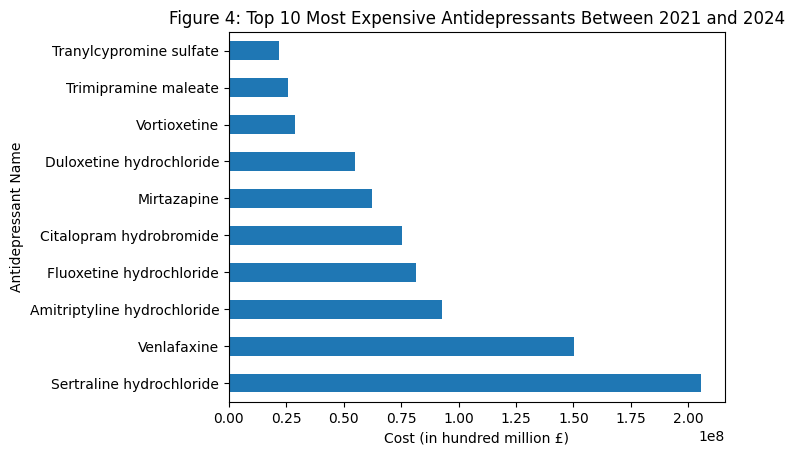

In [21]:
# This time, sum the "COST column"
chemical_summary["COST"].sum().sort_values(ascending=False).head(10).plot.barh(
    title="Figure 4: Top 10 Most Expensive Antidepressants Between 2021 and 2024",
    xlabel="Cost (in hundred million £)",
    ylabel="Antidepressant Name"
)

As expected, Sertraline hydrochloride is the most prescribed across the four years, and hence the most expensive across the four years. Surprisingly, Venlafaxine is the sixth most prescribed, yet second most expensive. Meanwhile, Mirtazapine is the 4th-most prescribed at approximately 47 million prescriptions across the four years, yet is 6th-most expensive at approximately 65 million pounds. Lastly, escitalopram, paroxetine hydrochloride, and trazodone hydrochloride are the 8th, 9th, and 10th most-prescribed, respectively, yet are not costly enough to make it to the top ten most expensive antidepressants chart. They are replaced by Vortioxetine, trimipramine maleate, and tranylcypromine sulfate.

## Part Two (Longitudinal Analysis)

Now you have a good understanding around national and regional antidepressant prescribing volume and cost trends.
You will be given various topics or points to explore, and you will decide what approach or charts best does this.
To supplement the initial analysis, you will now:

-   Look at the longitudinal (monthly) trend for all antidepressant items and for the cost of antidepressant prescribing
-   Then, explore the data and find the antidepressant drugs that are driving these monthly item and cost trends.
-   Then give a high-level summary to your work and findings.




---



## Longitudinal Analysis: Identifying the Drivers of Cost and Prescription Numbers

To find the antidepressant drugs that are driving monthly item and cost trends, this report focuses on the top ten most prescribed antidepressants and top ten most costly antidepressants as listed in the previous section. This is because it is unlikely for other antidepressants to have a significant impact on prescription number or prescription cost, as shown by Figure 5 and Figure 6 below. From Figure 5, it is apparent that the top ten most prescribed antidepressants have always been the most prescribed. Although the cost of certain antidepressants have fluctuated greatly as shown by Figure 6, these wildly-fluctuating costs are also in the top ten most expensive antidepressants. Hence the following line graphs will be filtered to show only the top ten most-prescribed and most-costly antidepressants, creating a cleaner and clearer picture of the trends.

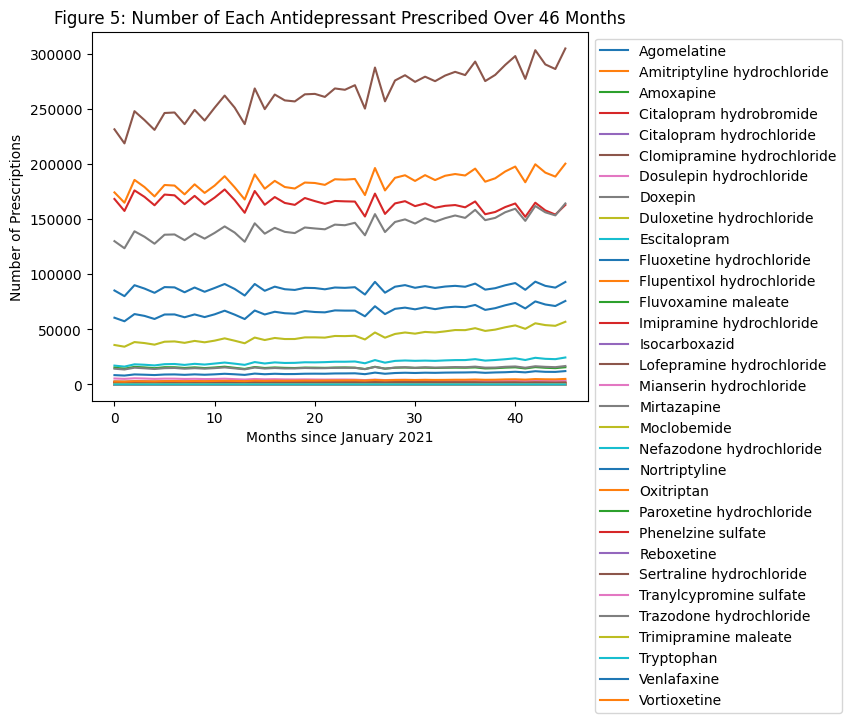

In [22]:
# Create a pivot table with Months since January 2021 as the index, and
# antidepressant names as the columns. The values are the number of prescriptions
# made that month.
drug_summary_line_chart = pca_regional_drug_summary_df.pivot_table(
    index="YEAR_MONTH",
    columns="BNF_CHEMICAL_SUBSTANCE",
    values="ITEMS",
).reset_index(drop=True).plot.line(
    title="Figure 5: Number of Each Antidepressant Prescribed Over 46 Months",
    xlabel="Months since January 2021",
    ylabel="Number of Prescriptions",
)

drug_summary_line_chart.legend(bbox_to_anchor=(1.0, 1.0))

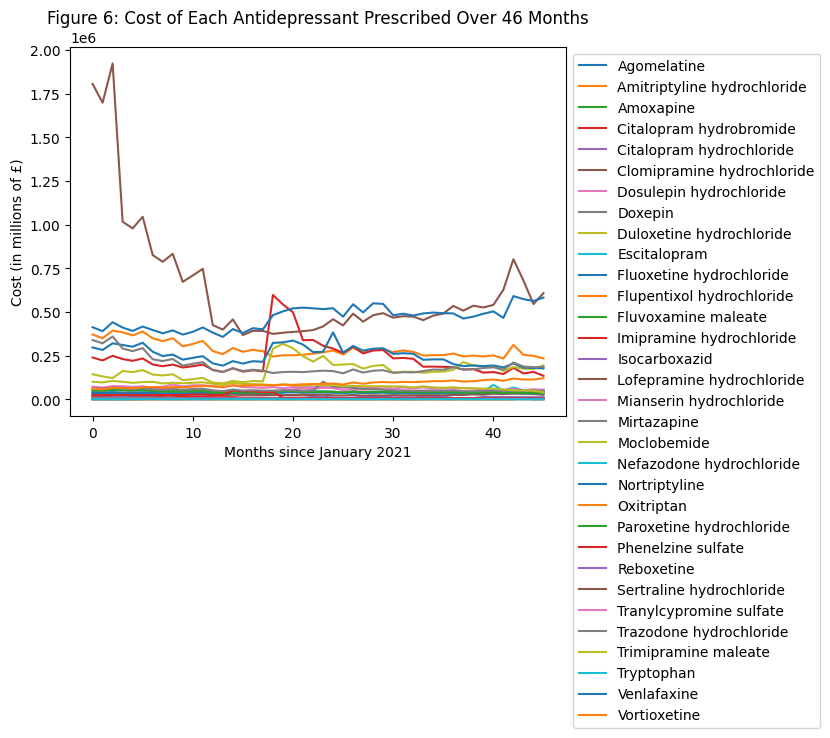

In [23]:
drug_summary_line_chart = pca_regional_drug_summary_df.pivot_table(
    index="YEAR_MONTH",
    columns="BNF_CHEMICAL_SUBSTANCE",
    values="COST",
).reset_index(drop=True).plot.line(
    title="Figure 6: Cost of Each Antidepressant Prescribed Over 46 Months",
    xlabel="Months since January 2021",
    ylabel="Cost (in millions of £)",
)

drug_summary_line_chart.legend(bbox_to_anchor=(1.0, 1.0))

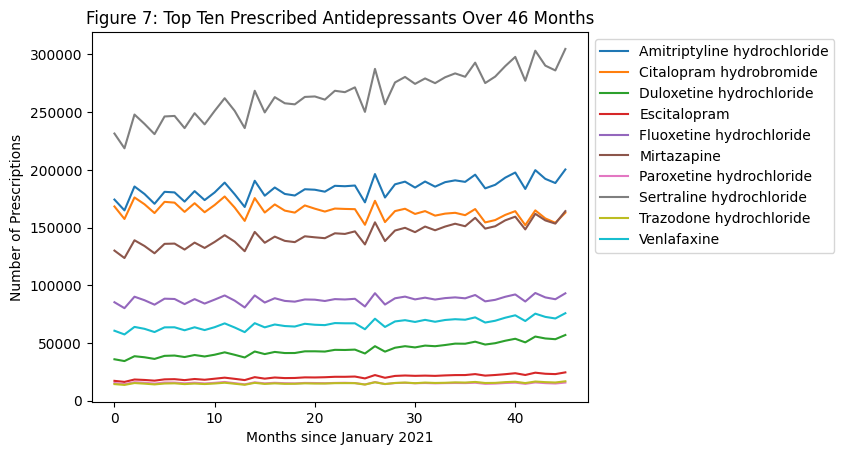

In [24]:
top_ten_prescribed = ["Trazodone hydrochloride", "Paroxetine hydrochloride",
                      "Escitalopram", "Duloxetine hydrochloride", "Venlafaxine",
                      "Fluoxetine hydrochloride", "Mirtazapine", "Citalopram hydrobromide",
                      "Amitriptyline hydrochloride", "Sertraline hydrochloride"]

pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"]
                             .isin(top_ten_prescribed)].pivot_table(
                                 index="YEAR_MONTH",
                                 columns="BNF_CHEMICAL_SUBSTANCE",
                                 values="ITEMS",
                             ).reset_index(drop=True).plot.line(
                                 title="Figure 7: Top Ten Prescribed Antidepressants Over 46 Months",
                                 xlabel="Months since January 2021",
                                 ylabel="Number of Prescriptions",
                             ).legend(bbox_to_anchor=(1.0, 1.0))

Based on the information in Figure 7, Sertraline hydrochloride is the primary driver of antidepressant prescription count. Over four years, the number of Sertraline hydrochloride prescriptions has increased overall, from approximately 235,000 prescriptions in 2021 to approximately 300,000 prescriptions by 2024. Amitriptyline hydrochloride is the secondary driver of antidepressant prescriptions, though the number of amitriptyline prescriptions has remained stable compared to sertraline hydrochloride. Lastly, the number of Citalopram hydrobromide prescriptions has begun to fall, but the increase in Mirtazapine prescriptions compensates for its decrease.

As a result, recent months show that **Sertraline hydrochloride is the main contributor to the number of antidepressant prescriptions**, but amitriptyline hydrochloride and Mirtazapine are also contributors that are growing in prominence.

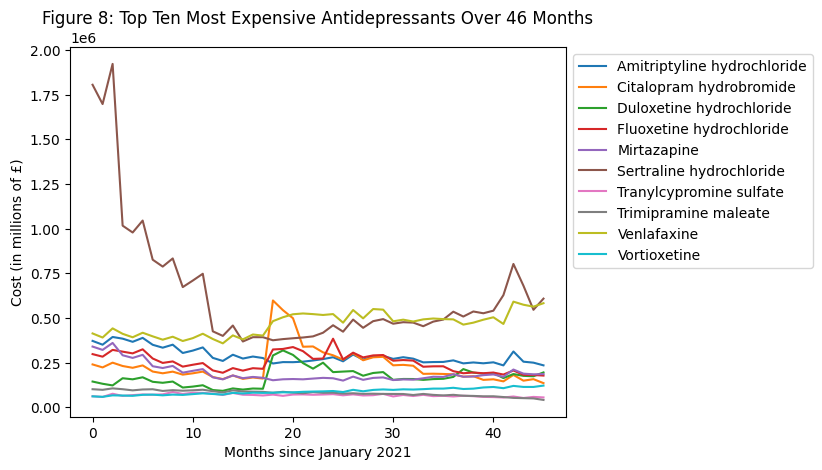

In [25]:
top_ten_expenses = ["Tranylcypromine sulfate", "Trimipramine maleate",
                    "Vortioxetine", "Duloxetine hydrochloride", "Mirtazapine",
                    "Citalopram hydrobromide", "Fluoxetine hydrochloride",
                    "Amitriptyline hydrochloride", "Venlafaxine",
                    "Sertraline hydrochloride"]

pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"]
                             .isin(top_ten_expenses)].pivot_table(
                                 index="YEAR_MONTH",
                                 columns="BNF_CHEMICAL_SUBSTANCE",
                                 values="COST",
                             ).reset_index(drop=True).plot.line(
                                 title="Figure 8: Top Ten Most Expensive Antidepressants Over 46 Months",
                                 xlabel="Months since January 2021",
                                 ylabel="Cost (in millions of £)",
                             ).legend(bbox_to_anchor=(1.0, 1.0))

Figure 8 reveals the significant impact Sertraline hydrochloride has on the cost of antidepressant prescriptions. The dramatic drop in the cost of antidepressants between 2021 and 2022 appears to be caused primarily by a fall in the cost of Sertraline hydrochloride, from approximately £1.8 million at the start of 2021 to approximately £400,000 at Sertraline hydrochloride's lowest point in 2022. Notably, the total spent on Citalopram hydrobromide, fluoxetine hydrochloride, and Duloxetine hydrochloride also spiked in 2022, but has since fallen to more moderate levels.

From the graph, it is clear that **Sertraline hydrochloride and Venlafaxine have been the main drivers of antidepressant prescription cost**. The cost of most antidepressants have fallen since 2021 or their spike in 2022. However, the cost of Sertraline hydrochloride has risen to £500,000 by the end of 2024. Similarly, the cost of Venlafaxine has risen from approximately £400,000 in January 2021 to approximately £500,000 in October 2024.

## Part Two Extension (Antidepressant Case studies)

The extension is only to be attempted if you completed the data_metrics_and_insights learning material and exercises.
The analyses within this section will delve a bit deeper into antidepressant prescribing costs.

-   Focus on one or more antidepressants that play a significant role in national volume and cost trends
-   Percentage of total antidepressant volume or cost from a drug
-   Mean cost per item in relation a drug
-   Distribution of mean cost per item values for a drug
-   Anything else you think might be informative or relevant (be creative!)
-   Then give a high-level summary to your work and findings.



## The Impact of Sertraline Hydrochloride

Since Sertraline hydrochloride was identified as a primary driver of both cost of prescriptions and the number of prescriptions, the remainder of this report delves into the extent of the influence of sertraline hydrochloride over four years.

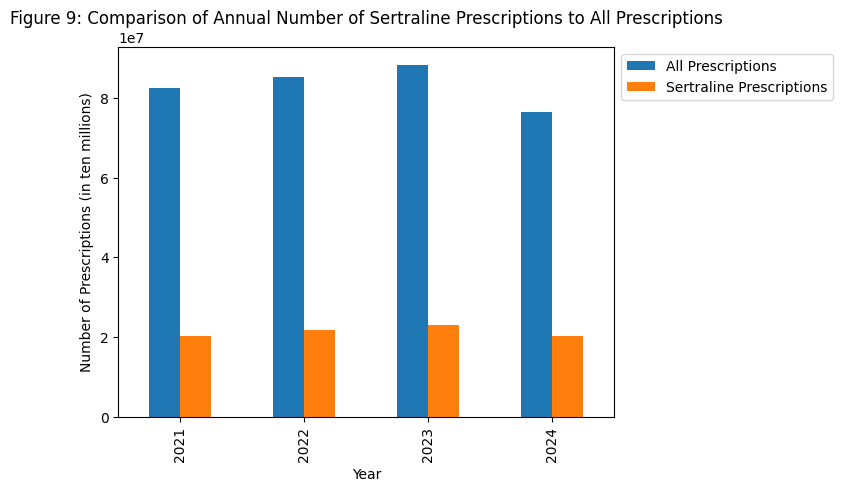

In [26]:
# We will analyze the annual percentage of total antidepressant volume and cost
# of Sertraline hydrochloride

# Create a new table that filters for Sertraline only
annual_sertraline_statistics = pca_regional_drug_summary_df[pca_regional_drug_summary_df["BNF_CHEMICAL_SUBSTANCE"]=="Sertraline hydrochloride"].groupby("YEAR")

# Group two tables by YEAR and sum their items
sertraline_table = annual_sertraline_statistics["ITEMS"].sum()
all_table = annual_drug_summary["ITEMS"].sum()

# Put both sums on the same bar graph.
number_prescriptions_comparison = pd.DataFrame(
    {"All Prescriptions": all_table.values,
     "Sertraline Prescriptions": sertraline_table.values,},
    index=all_table.index,
)

number_prescriptions_comparison.plot.bar(
    title="Figure 9: Comparison of Annual Number of Sertraline Prescriptions to All Prescriptions",
    xlabel="Year",
    ylabel="Number of Prescriptions (in ten millions)",
).legend(bbox_to_anchor=(1.0, 1.0))

In [27]:
number_prescriptions_comparison["Percentage of All Prescriptions"] = number_prescriptions_comparison["Sertraline Prescriptions"] / number_prescriptions_comparison['All Prescriptions'] * 100
number_prescriptions_comparison

,All Prescriptions,Sertraline Prescriptions,Percentage of All Prescriptions
YEAR,,,
2021,82620542,20297395,24.567008
2022,85404862,21745808,25.462026
2023,88469803,23069827,26.076499
2024,76582374,20289221,26.493330


As shown by Figure 9 and the table above, Sertraline hydrochloride prescriptions take up a large percentage of all antidepressant prescriptions. From 2021 to 2024, Sertraline hydrochloride comprises approximately a quarter of all prescriptions, and this percentage is steadily rising.

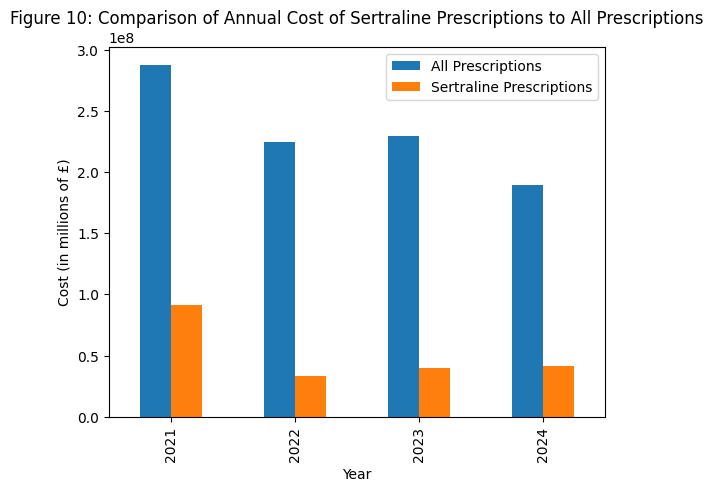

In [28]:
# Group two tables by YEAR and sum their costs
sertraline_table = annual_sertraline_statistics["COST"].sum()
all_table = annual_drug_summary["COST"].sum()

# Put both sums on the same bar graph.
cost_prescriptions_comparison = pd.DataFrame(
    {"All Prescriptions": all_table.values,
     "Sertraline Prescriptions": sertraline_table.values,},
    index=all_table.index,
)

cost_prescriptions_comparison.plot.bar(
    title="Figure 10: Comparison of Annual Cost of Sertraline Prescriptions to All Prescriptions",
    xlabel="Year",
    ylabel="Cost (in millions of £)",
).legend(bbox_to_anchor=(1.0, 1.0))

In [29]:
cost_prescriptions_comparison["Percentage of All Prescriptions"] = cost_prescriptions_comparison["Sertraline Prescriptions"] / cost_prescriptions_comparison["All Prescriptions"] * 100
cost_prescriptions_comparison

,All Prescriptions,Sertraline Prescriptions,Percentage of All Prescriptions
YEAR,,,
2021,2.880992e+08,91304824.72,31.692142
2022,2.246484e+08,33495849.17,14.910341
2023,2.300137e+08,39464970.52,17.157664
2024,1.891889e+08,41387330.77,21.876191


The cost of Sertraline hydrochloride comprised almost one third (31.7%) of the cost of all prescriptions in 2021. This percentage then fell to 14.9% in 2022, but has since risen to 21.8% in 2024. The increasing trend from 2022 to 2024 corresponds with the increasing percentage of the number of sertraline hydrochloride prescriptions. However, it is worth investigating whether the cost of sertraline hydrochloride prescriptions is growing faster than the number of sertraline hydrochloride prescriptions.

To investigate the growth of the cost of sertraline hydrochloride against the number of sertraline hydrochloride prescriptions, calculate the mean cost per item of sertraline hydrochloride for each month.

In [30]:
# Group the sertraline statistics by YEAR_MONTH, then sum the items and cost for each month
monthly_sertraline_stats = sertraline_stats.groupby("YEAR_MONTH")[["ITEMS", "COST"]].sum()

# Divide Cost by Items to obtain cost per item
monthly_sertraline_stats["Cost Per Item"] = monthly_sertraline_stats["COST"] / monthly_sertraline_stats["ITEMS"]
monthly_sertraline_stats

,ITEMS,COST,Cost Per Item
YEAR_MONTH,,,
202101,1620265,12639289.40,7.800754
202102,1530749,11883267.56,7.763041
202103,1735443,13455922.57,7.753595
202104,1678799,7118069.48,4.239977
202105,1616528,6849723.97,4.237306
202106,1723773,7317593.06,4.245102
202107,1727059,5784191.72,3.349157
202108,1653026,5514023.12,3.335715
202109,1743703,5833193.96,3.345291


<Axes: title={'center': 'Figure 11: Average Cost Per Item of Sertraline Hydrochloride Over 48 Months'}, xlabel='Months since January 2021', ylabel='Cost / Item (£ / prescription)'>

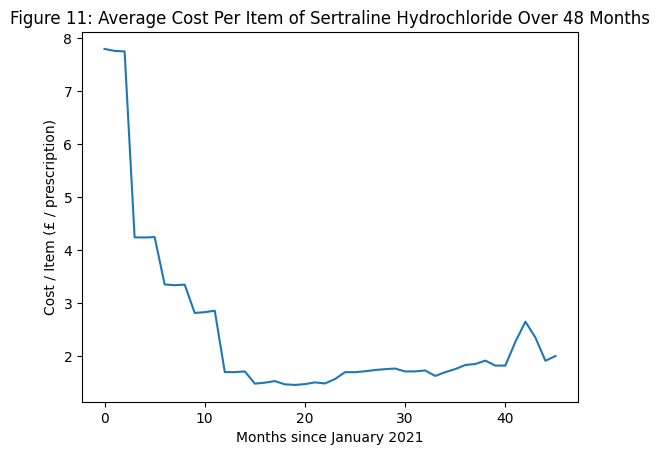

In [31]:
# Graph the Cost per Item on a line graph
monthly_sertraline_stats.reset_index()["Cost Per Item"].plot.line(
    title="Figure 11: Average Cost Per Item of Sertraline Hydrochloride Over 48 Months",
    xlabel="Months since January 2021",
    ylabel="Cost / Item (£ / prescription)",
)

Based on Figure 11, the cost per unit of sertraline hydrochloride dropped sharply throughout 2021. Since then, the cost per unit has been slowly increasing, with a sudden spike in 2024. This shows that the cost of Sertraline hydrochloride has recently been increasing faster than the number of Sertraline hydrochloride prescriptions, which may affect or place financial strain on people who need sertraline hydrochloride.

Lastly, identifying regions where the number and cost of sertraline hydrochloride prescriptions has grown the fastest may help the NHS plan and budget for Sertraline hydrochloride prescriptions.

In [32]:
regional_sertraline_prescriptions = sertraline_stats.pivot_table(
    columns="REGION_NAME",
    index="YEAR_MONTH",
    values="ITEMS",
)
regional_sertraline_prescriptions

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR_MONTH,,,,,,,
202101,178683.0,171000.0,304951.0,346169.0,257334.0,209209.0,152919.0
202102,167064.0,164843.0,287545.0,328345.0,243629.0,197016.0,142307.0
202103,187468.0,189298.0,325477.0,374477.0,276668.0,221730.0,160325.0
202104,183710.0,181775.0,316383.0,358674.0,268202.0,214139.0,155916.0
202105,176807.0,178645.0,302744.0,344466.0,255283.0,208191.0,150392.0
202106,186826.0,191344.0,324849.0,369540.0,274189.0,218894.0,158131.0
202107,188662.0,191306.0,324387.0,367206.0,273296.0,222954.0,159248.0
202108,180187.0,183253.0,310913.0,352989.0,262645.0,211090.0,151949.0
202109,188091.0,195798.0,330373.0,371724.0,277948.0,220501.0,159268.0


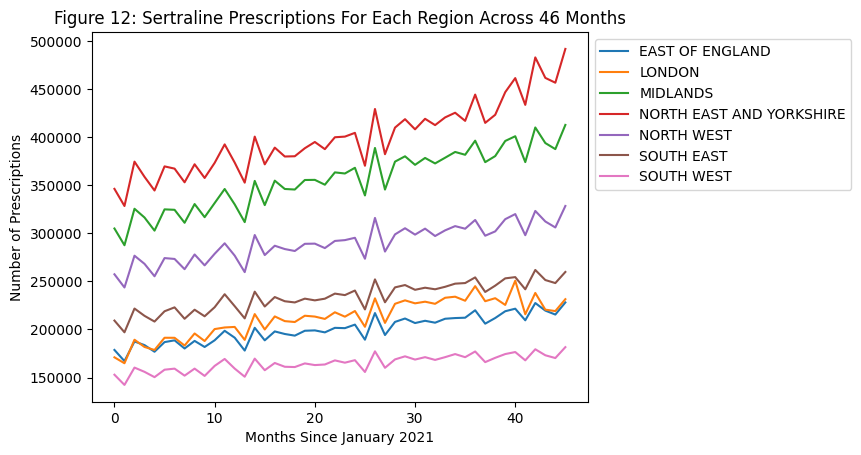

In [33]:
regional_sertraline_prescriptions.reset_index(drop=True).plot.line(
    title="Figure 12: Sertraline Prescriptions For Each Region Across 46 Months",
    xlabel="Months Since January 2021",
    ylabel="Number of Prescriptions"
).legend(bbox_to_anchor=(1.0, 1.0))

Although each region has similar trends in the number of Sertraline prescriptions over the four years, the North East and Yorkshire and the Midlands have a much higher number of prescriptions than other regions (Figure 12). Most importantly, Figure 12 reveals that the rate of growth of prescriptions in the North East and Yorkshire and the Midlands between 2021 and 2024 is also higher than that of other regions. The number of Sertraline hydrochloride prescriptions in the North East and Yorkshire increased by almost 150,000 prescriptions across the 46 months, while the number of prescriptions in the Midlands increased by almost 100,000 prescriptions. In other regions, the increase is less than 50,000 prescriptions over the four years.

In [34]:
regional_sertraline_cost = sertraline_stats.pivot_table(
    columns="REGION_NAME",
    index="YEAR_MONTH",
    values="COST"
)
regional_sertraline_cost

REGION_NAME,EAST OF ENGLAND,LONDON,MIDLANDS,NORTH EAST AND YORKSHIRE,NORTH WEST,SOUTH EAST,SOUTH WEST
YEAR_MONTH,,,,,,,
202101,1338729.74,1367616.91,2424080.01,2521944.00,1939567.96,1816988.59,1230362.19
202102,1246579.12,1312193.24,2275215.94,2384840.28,1826536.26,1698305.04,1139597.68
202103,1397705.89,1512803.63,2571437.11,2721513.20,2068196.44,1903245.63,1281020.67
202104,751312.64,794326.90,1365217.35,1414585.05,1085644.33,1019490.56,687492.65
202105,721258.51,781817.00,1305205.99,1355517.60,1036574.08,987798.10,661552.69
202106,762877.91,843350.91,1401931.95,1458379.42,1113102.73,1038093.15,699856.99
202107,609816.16,664898.17,1106622.46,1137064.32,867898.73,841291.40,556600.48
202108,580202.91,629751.03,1052424.37,1088889.32,835735.18,797144.22,529876.09
202109,604940.34,680977.73,1123563.87,1155293.25,883698.21,828622.14,556098.42


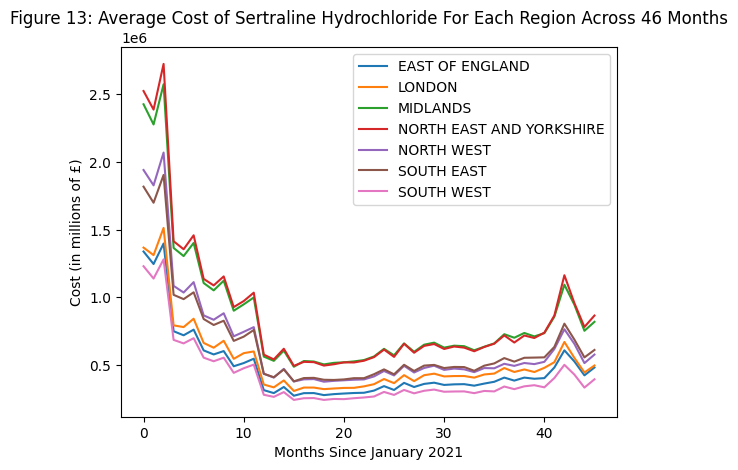

In [35]:
regional_sertraline_cost.reset_index(drop=True).plot.line(
    title="Figure 13: Average Cost of Sertraline Hydrochloride For Each Region Across 46 Months",
    xlabel="Months Since January 2021",
    ylabel="Cost (in millions of £)"
).legend(bbox_to_anchor=(1.0, 1.0))

The cost of sertraline hydrochloride also follows similar trends across all regions; the cost falls and rises at similar rates across the 46 months (Figure 13). The North East and Yorkshire generally spends the most on sertraline hydrochloride prescriptions, although the Midlands spends a similar amount. Surprisingly, it appears that the South East spends more on sertraline hydrochloride prescriptions than the North West (Figure 13), despite the North West having approximately 50,000 more sertraline hydrochloride prescriptions than the South East each month (Figure 12). Besides this inconsistency, the order of sertraline hydrochloride prescription numbers matches the order of sertraline hydrochloride prescription costs. Regardless, it will be informative to perform longitudinal analysis on the cost per unit of sertraline hydrochloride for each region.

In [36]:
regional_sertraline_stats = sertraline_stats.groupby(["REGION_NAME", "YEAR_MONTH"])[["ITEMS", "COST"]].sum()
regional_sertraline_stats["COST_PER_ITEM"] = regional_sertraline_stats["COST"] / regional_sertraline_stats["ITEMS"]
regional_sertraline_stats

ITEMS        COST  COST_PER_ITEM
REGION_NAME     YEAR_MONTH                                   
EAST OF ENGLAND 202101      178683  1338729.74       7.492205
                202102      167064  1246579.12       7.461686
                202103      187468  1397705.89       7.455704
                202104      183710   751312.64       4.089667
                202105      176807   721258.51       4.079355
...                            ...         ...            ...
SOUTH WEST      202406      167872   406375.92       2.420749
                202407      179380   503637.40       2.807656
                202408      173144   431538.73       2.492369
                202409      170256   335752.93       1.972048
                202410      181588   396815.37       2.185251

[322 rows x 3 columns]

<Axes: title={'center': 'Figure 14: Average Cost Per Sertraline Hydrochloride Prescription For Each Region Over 46 Months'}, xlabel='Months Since January 2021', ylabel='Cost / Prescription (£ / unit)'>

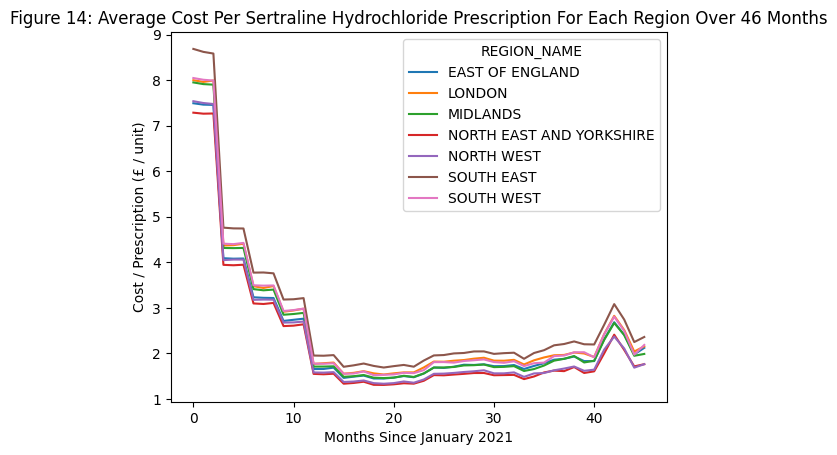

In [37]:
regional_sertraline_stats.pivot_table(
    columns="REGION_NAME",
    index="YEAR_MONTH",
    values="COST_PER_ITEM",
).reset_index(drop=True).plot.line(
    title="Figure 14: Average Cost Per Sertraline Hydrochloride Prescription For Each Region Over 46 Months",
    xlabel="Months Since January 2021",
    ylabel="Cost / Prescription (£ / unit)"
)

The trend of average cost per prescription of sertraline hydrochloride is remarkably similar across all regions. The drop in cost per prescription in 2021 matches the drop in overall cost as seen in Figure 13. However, Figure 14 shows that the South East has the highest cost per prescription of sertraline hydrochloride, despite having the median number of prescriptions across all 46 examined months. Meanwhile, the North East and Yorkshire has one of the lowest cost per prescription of sertraline hydrochloride, while the Midlands has a cost per prescription closer to the median.

## Summary and Conclusion

The annual number of prescriptions has generally increased from 2021 to 2023, but fell in 2024. Meanwhile, the annual cost of prescriptions fell dramatically between 2021 and 2022, increased slightly, then fell again between 2023 and 2024. These decreases in prescription number and prescription cost between 2023 and 2024 may be because the dataset only contains 10 months of data for 2024, while the other years contain all 12 months. Taking the missing months into account, it is reasonable to assume that antidepressant prescriptions and costs will continue to grow in 2024 and beyond.

A breakdown of the specific antidepressants prescribed shows that sertraline hydrochloride is a primary driver of both total antidepressant prescriptions and total antidepressant costs. Every year, it accounts for a higher percentage of total prescriptions and costs. The average cost of sertraline hydrochloride itself is also growing each year, and can be expected to continue growing in the future.

Examining the cost and numbers of sertraline hydrochloride prescriptions between across regions shows that the South East has a higher cost per prescription of sertraline hydrochloride. The reasons for this higher cost are worth investigating in future reports and analysis. Additionally, the Midlands and the North East and Yorkshire are seeing significant growth in the number of sertraline hydrochloride prescriptions, suggesting that mental health resources should be concentrated in those regions. Future studies should focus on specific regions within the Midlands and the North East and Yorkshire that require more resources.